In [4]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

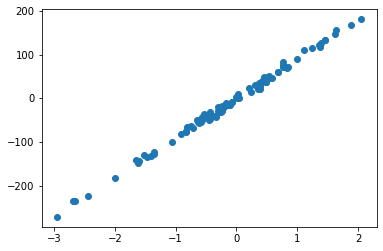

In [72]:
X, y = make_regression(n_samples = 100, n_features=1, noise = 6)
plt.scatter(X,y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
class LinearRegression:
    
    def __init__(self, lr, iter_max = 10000):
        self.lr = lr
        self.iter_max = iter_max
        self.weights = None
        self.bias = None
    
    
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        
        # Initialize the weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 1
        
        for _ in range(self.iter_max):
            
            # compute predictions
            predictions = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y) )
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return predictions
    
    def predict(self, X):
        predictions = np.dot(X, self.weights) + self.bias
        return predictions
    

In [59]:
def mse(true_values, predicted_values):
    return np.mean((true_values - predicted_values)**2)

<function matplotlib.pyplot.show(close=None, block=None)>

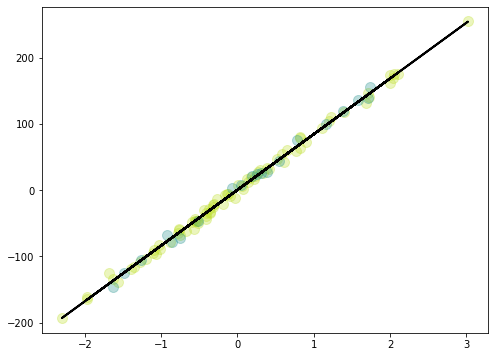

In [71]:
linear_regression = LinearRegression(lr = 0.001)
predictions_train = linear_regression.fit(X_train, y_train)
predictions_test = linear_regression.predict(X_test)

# show the result
y_pred_line = linear_regression.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=100, alpha=0.3)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s=100, alpha=0.3)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show